# EDA of Retention Dataset

## Objective

To conduct an initial exploratory analysis to identify potential factors associated with retention, using correlation, chi square test and regression. The goal is to identify early warning signs and potential intervention points.

## Summary

-Gap is a strong predictor of dropout, with a highly significant effect. However, students with "gap = 0" have over 80% dropout rate, which shows possible immediate dropout.

-Faculty differences are notable. Some programs, like Dentistry, Computer Science, Engineering, Health, and Management, have lower risk of dropout.

-Some academic and demographic factors, like switching to part time, low grades, csrde are also associated with dropout risk.

-Live in residence and urban background show better retention.

## Dataset Overview

-This dataset contains 909,616 rows and 64 columns.

-It includes attributes such as academic year, faculty, and country.

-The key target variable is 'has_dropped', indicating whether a student dropped out.

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from spicy import stats
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind
import statsmodels.formula.api as smf

In [33]:
df = pd.read_csv('enrollment_refactored.csv')

C:\Users\admin_2025\AppData\Local\Temp\ipykernel_16436\3678092571.py:1: DtypeWarning: Columns (34,45,53) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('enrollment_refactored.csv')


In [34]:
df.shape

(909616, 64)

In [35]:
df.head()

,banner_id,pidm,admit_term_key,term_code,academic_year,faculty_title,levl_desc,level_group,degree_desc,program_desc,...,lived_in_residence_once,is_graduated_ind,high_school_rank,term,calendar_year,has_dropped,count_of_high_risk_low_grades,count_of_high_risk_withdrawals,cum_high_risk_low_grades,cum_high_risk_withdrawals
0,B00001071,1071.0,199920,200020.0,2000,Faculty of Management,Graduate,Masters,Master of Business Admin,Master of Business Admin,...,0,0,NaN,Winter,2000,0,0,0,0,0
1,B00001071,1071.0,199920,200220.0,2002,Faculty of Management,Graduate,Masters,Master of Business Admin,Master of Business Admin,...,0,0,NaN,Winter,2002,0,0,0,0,0
2,B00001071,1071.0,199920,200310.0,2003,Faculty of Management,Graduate,Masters,Master of Business Admin,Master of Business Admin,...,0,0,NaN,Fall,2002,0,0,0,0,0
3,B00001071,1071.0,199920,200410.0,2004,Faculty of Management,Graduate,Masters,Master of Business Admin,Master of Business Admin,...,0,0,NaN,Fall,2003,0,0,0,0,0
4,B00001071,1071.0,199920,200420.0,2004,Faculty of Management,Graduate,Masters,Master of Business Admin,Master of Business Admin,...,0,0,NaN,Winter,2004,0,0,0,0,0


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 909616 entries, 0 to 909615
Data columns (total 64 columns):
 #   Column                                         Non-Null Count   Dtype  
---  ------                                         --------------   -----  
 0   banner_id                                      909616 non-null  object 
 1   pidm                                           909616 non-null  float64
 2   admit_term_key                                 909616 non-null  int64  
 3   term_code                                      909616 non-null  float64
 4   academic_year                                  909616 non-null  int64  
 5   faculty_title                                  909616 non-null  object 
 6   levl_desc                                      909616 non-null  object 
 7   level_group                                    909616 non-null  object 
 8   degree_desc                                    909616 non-null  object 
 9   program_desc                         

In [37]:
df['has_dropped'].value_counts()

has_dropped
0    801903
1    107713
Name: count, dtype: int64

## Data Analysis

### Use Correlation Matrix to find Relationships with Retention

In [38]:
# Choose key variables
num_vars = df.select_dtypes(include=['number'])
num_vars.columns.tolist()
key_num_vars = ['admit_term_key','academic_year','total_credit_hours','overall_tgpa_eot','varsity_ind','age','coop_ind','csrde_ind',
                'gap','switched_to_part_time','female','racialized_person','aboriginal_and_indigenous','person_with_disabilities',
                'sexual_orientation_gender_identity_minorities','black_ancestry','black_nova_scotian_ancestry','mikmaq','first_in_family',
                'international','is_local_to_agriculture_campus','is_local_to_dalhousie_campus', 'fall_gpa','high_school_gpa',
                'lived_in_residence_once','has_dropped','count_of_high_risk_low_grades','count_of_high_risk_withdrawals',
                'cum_high_risk_low_grades','cum_high_risk_withdrawals']

In [39]:
# Generate the target correlation list
cor_matrix = df[key_num_vars].corr()
target_corr = cor_matrix['has_dropped'].drop('has_dropped').sort_values(key=lambda x: abs(x), ascending=False)
target_corr

gap                                             -0.315259
csrde_ind                                       -0.067372
age                                              0.066814
admit_term_key                                  -0.055624
total_credit_hours                              -0.050719
academic_year                                   -0.038299
lived_in_residence_once                         -0.037496
aboriginal_and_indigenous                        0.024624
switched_to_part_time                            0.022519
coop_ind                                        -0.019094
high_school_gpa                                 -0.016016
count_of_high_risk_low_grades                   -0.015111
is_local_to_dalhousie_campus                    -0.014148
varsity_ind                                     -0.011909
black_ancestry                                   0.011590
overall_tgpa_eot                                -0.011107
female                                           0.010271
black_nova_sco

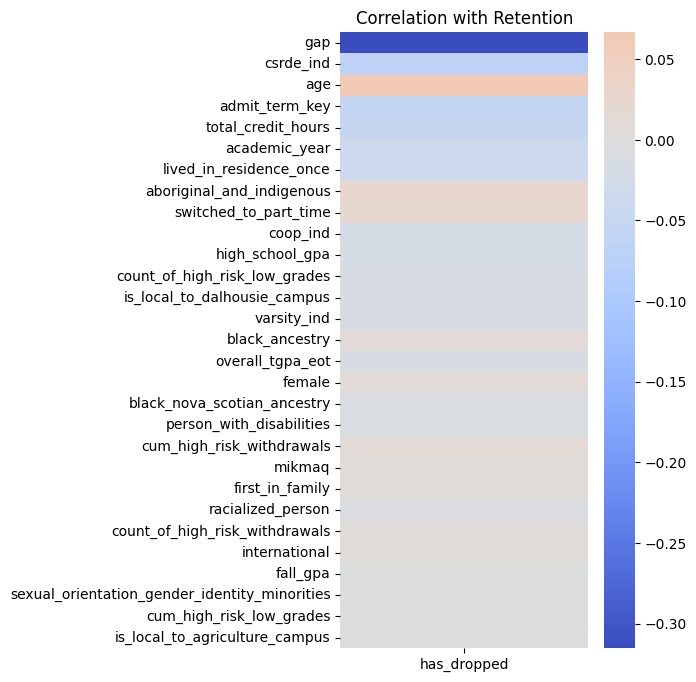

In [40]:
# Draw the heatmap
plt.figure(figsize = (4,8))
sns.heatmap(target_corr.to_frame(), cmap = 'coolwarm', center = 0, yticklabels=True)
plt.title('Correlation with Retention')
plt.show()

Insights:

-Gap (-0.315) showed the strongest negative correlation. This aligns with the intuition that a break in studies may signal disengagement or external challenges.

-Other negatively correlated variables include:

1.csrde_ind (-0.067):These students typically enter directly from high school and early in their academic journey.Their structured start may contribute to higher retention.

2.total_credit_hours (-0.051):The more credits a student earns, the less likely they are to drop out.

-Positively correlated variables suggest greater dropout risk:

1.age (+0.067): Older students are slightly more at risk, possibly due to competing life responsibilities.

2.Aboriginal_and_indigenous (+0.025) and switched_to_part_time (+0.023): These groups may face unique challenges and should be considered for additional support.

3.cum_high_risk_withdrawals, count_of_high_risk_withdrawals, and low_grades show that academic struggles are key signals of dropout risk, and these groups should be provided with academic support.

### Find the Relationship Between Faculty and Retention

In [41]:
df['faculty_title'].value_counts()

faculty_title
Faculty of Science                196937
Fac of Arts & Social Sciences     169286
Faculty of Health                 145143
Faculty of Management             108007
Faculty of Engineering            103811
Faculty of Computer Science        54814
Faculty of Medicine                38591
Faculty of Law                     23343
Faculty of Agriculture             20290
Fac of Architecture & Planning     19232
School of Journalism                9018
Faculty of Dentistry                8558
Faculty of Graduate Studies         6365
Interdisciplinary/Multi-Fac         6189
School of Education                   32
Name: count, dtype: int64

In [42]:
# A function that find the retention percentage across different attributes.
def sorted_cross_tab(df,index_col,column_col):
    cross_tab = pd.crosstab(df[index_col],df[column_col],normalize='index')*100
    sorted_cross_tab = cross_tab.sort_values(by=1,ascending=False)
    return sorted_cross_tab

In [43]:
faculty_retention = sorted_cross_tab(df, 'faculty_title', 'has_dropped')
faculty_retention

has_dropped,0,1
faculty_title,,
School of Journalism,78.953205,21.046795
Faculty of Graduate Studies,83.267871,16.732129
Faculty of Law,83.840980,16.159020
Fac of Architecture & Planning,84.822171,15.177829
Fac of Arts & Social Sciences,85.149392,14.850608
Faculty of Agriculture,85.791030,14.208970
Faculty of Medicine,87.108393,12.891607
School of Education,87.500000,12.500000
Faculty of Health,88.782787,11.217213


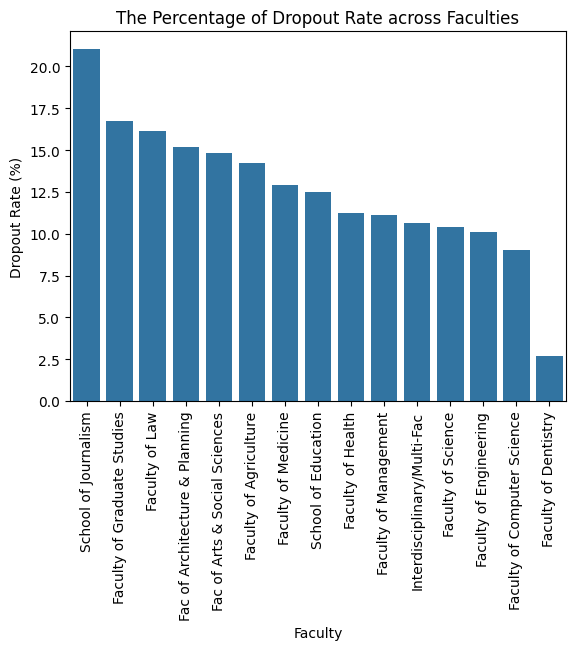

In [44]:
# Use bar chart to show percentage of dropout rate across faculties
faculty_retention = faculty_retention.rename(columns={1: 'dropout'})
sns.barplot(x = 'faculty_title',y = 'dropout',data = faculty_retention)
plt.xticks(rotation=90)
plt.title('The Percentage of Dropout Rate across Faculties')
plt.ylabel('Dropout Rate (%)')
plt.xlabel('Faculty')
plt.show()

The bar chart shows school of journalism has the highest dropout rate. Next, using chi square test to identify whether the finding is significant.

In [45]:
chi2, p, dof, expected = chi2_contingency(faculty_retention)
print(f"P-value for switch to faculty vs. retention: {p}")

P-value for switch to faculty vs. retention: 0.07294541336990057


However, the p value is not significant in the chi test, possibly due to a small sample size(school of education)

In [46]:
# Use logistic regression instead of chi test.
model = smf.logit('has_dropped ~ C(faculty_title)', data=df).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.360960
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:            has_dropped   No. Observations:               909616
Model:                          Logit   Df Residuals:                   909601
Method:                           MLE   Df Model:                           14
Date:                Fri, 09 May 2025   Pseudo R-squ.:                0.007688
Time:                        14:55:04   Log-Likelihood:            -3.2834e+05
converged:                       True   LL-Null:                   -3.3088e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                                        coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
Intercept                     

Insights:

-Faculty of dentistry has the lowest dropout rate (coefficient = -1.86).

-Faculty of computer science, engineering, health, and management also show significantly lower dropout.

-Faculty of journalism has the highest dropout(coefficient = 0.3986).

-School of education has a non-significant result (p = 0.674), possibly due to small sample size.

-Pseudo R-squared is very low, need to combine analysis with other factors.

In [47]:
# # Change coefficient to odds ratios to improve clarity.
# odds_ratios = np.exp(model.params).sort_values(ascending = False)
# print(odds_ratios)

### Find the Relationship Between Gap and Retention

In [48]:
gap_retention = sorted_cross_tab(df, 'gap', 'has_dropped')
gap_retention

has_dropped,0,1
gap,,
0.0,15.122959,84.877041
19.0,60.784314,39.215686
16.0,62.068966,37.931034
22.0,70.833333,29.166667
13.0,72.992701,27.007299
18.0,79.775281,20.224719
31.0,80.000000,20.000000
15.0,81.456954,18.543046
25.0,82.352941,17.647059


In [49]:
chi2, p, dof, expected = chi2_contingency(gap_retention)
print(f"P-value for gap vs. retention: {p}")

P-value for gap vs. retention: 0.0


In [50]:
model = smf.logit('has_dropped ~ gap', data=df).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.085598
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:            has_dropped   No. Observations:               670566
Model:                          Logit   Df Residuals:                   670564
Method:                           MLE   Df Model:                            1
Date:                Fri, 09 May 2025   Pseudo R-squ.:                  0.6892
Time:                        14:55:07   Log-Likelihood:                -57399.
converged:                       True   LL-Null:                   -1.8467e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2765      0.010    130.730      0.000       1.257       1.296
gap           -5.6349      0

Insights:

-The gap has a strong and significant effect on dropout (p < 0.001), and the model explains the data well (Pseudo R-squared = 0.689). As the gap increases by one unit, the chance of dropping out goes down.

-But combined with crosstab, when the gap is zero, the dropout rate is very high (over 80%), possibly because these students already gave up and never came back. 

-Need to include more variables in the model to make prediction and identify high risk groups. And with these insights, we can support timely human interventions.

### Explore How Other Factors that Influence Retention

In [51]:
liveinred_retention = sorted_cross_tab(df, 'lived_in_residence_once', 'has_dropped')
liveinred_retention

has_dropped,0,1
lived_in_residence_once,,
0,87.651544,12.348456
1,91.054073,8.945927


In [52]:
chi2, p, dof, expected = chi2_contingency(liveinred_retention)
print(f"P-value for live in residence vs. retention: {p}")

P-value for live in residence vs. retention: 0.5817812819766335


In [53]:
full_parttime_retention = sorted_cross_tab(df, 'switched_to_part_time', 'has_dropped')
full_parttime_retention

has_dropped,0,1
switched_to_part_time,,
1,84.513427,15.486573
0,88.303649,11.696351


In [54]:
chi2, p, dof, expected = chi2_contingency(full_parttime_retention)
print(f"P-value for switch to part-time vs. retention: {p}")

P-value for switch to part-time vs. retention: 0.5648034892555629


In [55]:
urban_rural_retention = sorted_cross_tab(df, 'urban_rural', 'has_dropped')
urban_rural_retention

has_dropped,0,1
urban_rural,,
urban,88.329406,11.670594
rural,88.388237,11.611763


In [56]:
chi2, p, dof, expected = chi2_contingency(urban_rural_retention)
print(f"P-value for urban or rural vs. retention: {p}")

P-value for urban or rural vs. retention: 1.0


## Next Steps

-Use Power BI to visualize insights interactively.

-Identify combined risk factors across faculties.

-Explore impact of gap and find out the best time for human intervention.

-Segment students for intervention with predictive models.

-Break yearly retention into term retention and consider adding time series elements to identify students at risk during a term.

-Identify other factors which may impact retention.